📊 Seen Prompt Results
Baseline:        0.80
Fine-tuned 0.2:  1.10
Fine-tuned 0.5:  1.20

📊 Unseen Prompt Results
Baseline (unseen):     0.50
Fine-tuned (unseen):   1.40


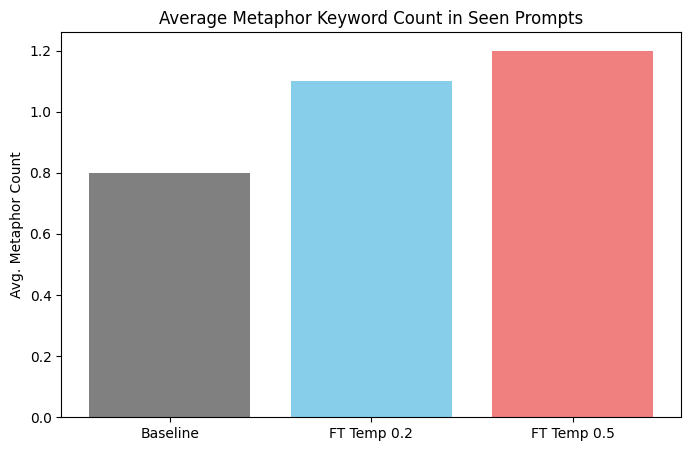

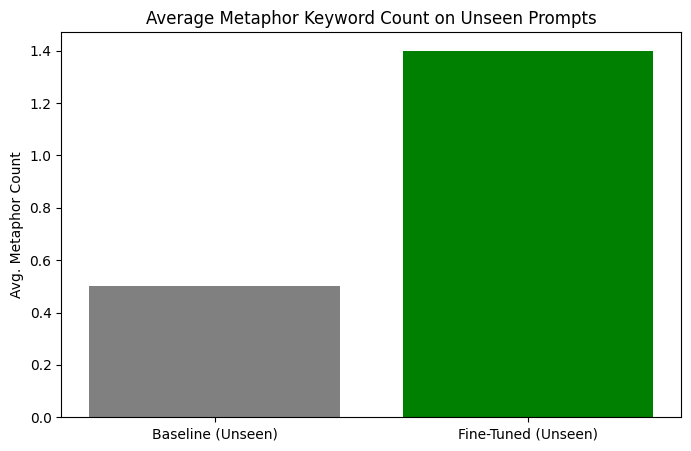

In [5]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define metaphor-related keywords
keywords = [
    "compass", "foundation", "path", "bridge", "guide", "terrain", "lighthouse", "forest",
    "navigation", "map", "voyage", "anchor", "harbor", "seed", "root", "growth", "castle",
    "blueprint", "clockwork", "architect", "fabric", "tide", "river", "soil", "landscape"
]

# Helper function
def count_metaphors(text):
    return sum(1 for word in keywords if word in text.lower())

# === Load Output Files ===

baseline_file = "/Users/cassia/GitHub/AI-Ethics-Fine-Tuning/outputs/baseline/baseline_responses_20250622_172447.json"
temp02_file = "/Users/cassia/GitHub/AI-Ethics-Fine-Tuning/outputs/temp02/fine_tuned_outputs_20250622_172709.json"
temp05_file = "/Users/cassia/GitHub/AI-Ethics-Fine-Tuning/outputs/temp05/fine_tuned_outputs_20250622_172758.json"
unseen_file = "/Users/cassia/GitHub/AI-Ethics-Fine-Tuning/outputs/unseen/unseen_comparison_20250622_180330.json"



# Replace these with actual filenames
with open(baseline_file, "r") as f: baseline = pd.DataFrame(json.load(f))
with open(temp02_file, "r") as f: temp02 = pd.DataFrame(json.load(f))
with open(temp05_file, "r") as f: temp05 = pd.DataFrame(json.load(f))
with open(unseen_file, "r") as f: unseen = json.load(f)

# Extract and count metaphors
baseline["metaphor_count"] = baseline["completion"].apply(count_metaphors)
temp02["metaphor_count"] = temp02["completion"].apply(count_metaphors)
temp05["metaphor_count"] = temp05["completion"].apply(count_metaphors)

# Unseen comparisons
unseen_baseline = pd.DataFrame(unseen["baseline"])
unseen_ft = pd.DataFrame(unseen["fine_tuned"])

unseen_baseline["metaphor_count"] = unseen_baseline["completion"].apply(count_metaphors)
unseen_ft["metaphor_count"] = unseen_ft["completion"].apply(count_metaphors)

# === Print Averages ===
print("📊 Seen Prompt Results")
print(f"Baseline:        {baseline['metaphor_count'].mean():.2f}")
print(f"Fine-tuned 0.2:  {temp02['metaphor_count'].mean():.2f}")
print(f"Fine-tuned 0.5:  {temp05['metaphor_count'].mean():.2f}")

print("\n📊 Unseen Prompt Results")
print(f"Baseline (unseen):     {unseen_baseline['metaphor_count'].mean():.2f}")
print(f"Fine-tuned (unseen):   {unseen_ft['metaphor_count'].mean():.2f}")


# === Plot Main Fine-Tuned Comparison ===
plt.figure(figsize=(8, 5))
plt.bar(
    ["Baseline", "FT Temp 0.2", "FT Temp 0.5"],
    [baseline["metaphor_count"].mean(), temp02["metaphor_count"].mean(), temp05["metaphor_count"].mean()],
    color=["gray", "skyblue", "lightcoral"]
)
plt.title("Average Metaphor Keyword Count in Seen Prompts")
plt.ylabel("Avg. Metaphor Count")
plt.show()

# === Plot Generalization (Unseen Prompts) ===
plt.figure(figsize=(8, 5))
plt.bar(
    ["Baseline (Unseen)", "Fine-Tuned (Unseen)"],
    [unseen_baseline["metaphor_count"].mean(), unseen_ft["metaphor_count"].mean()],
    color=["gray", "green"]
)
plt.title("Average Metaphor Keyword Count on Unseen Prompts")
plt.ylabel("Avg. Metaphor Count")
plt.show()
